In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = {
    "CGPA": [">=9", ">=8", ">=9", "<8", ">=8", ">=9", "<8", ">=9", ">=8", ">=8"],
    "InterActive": ["Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes"],
    "Practical Knowledge": ["Very Good", "Good", "Average", "Average", "Good", "Good", "Good", "Very Good", "Good", "Average"],
    "Comm Skills": ["Good", "Moderate", "Poor", "Good", "Moderate", "Moderate", "Poor", "Good", "Good", "Good"],
    "Job Offer": ["Yes", "Yes", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes"]
}

In [3]:
df = pd.DataFrame(data)

le = preprocessing.LabelEncoder()
encoded_df = df.apply(le.fit_transform)

X = encoded_df.drop(columns=["Job Offer"])
y = encoded_df["Job Offer"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", random_state=42)


clf.fit(X_train, y_train)

rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(rules)

Decision Tree Rules:
|--- CGPA <= 0.50
|   |--- class: 0
|--- CGPA >  0.50
|   |--- Comm Skills <= 1.50
|   |   |--- class: 1
|   |--- Comm Skills >  1.50
|   |   |--- class: 0




Model Accuracy: 100.00%


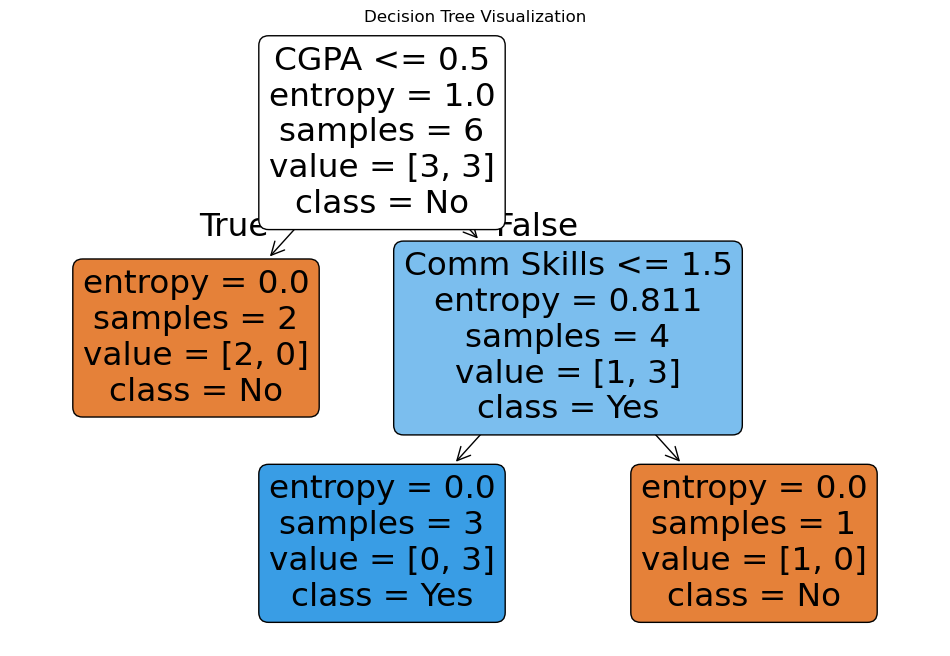

In [4]:
accuracy = clf.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
